# Assignment -> 3
## ------Abalone's age prediction using Regression--------

### importing necessary libraries...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### (1)&(2). Download dataset and Load the dataset into the tool.

In [104]:
df=pd.read_csv(r"D:\IBM Project\1Churn_Modelling.csv")

In [3]:
df.head(20)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    M   0.455     0.365   0.095        0.5140          0.2245   
1    M   0.350     0.265   0.090        0.2255          0.0995   
2    F   0.530     0.420   0.135        0.6770          0.2565   
3    M   0.440     0.365   0.125        0.5160          0.2155   
4    I   0.330     0.255   0.080        0.2050          0.0895   
5    I   0.425     0.300   0.095        0.3515          0.1410   
6    F   0.530     0.415   0.150        0.7775          0.2370   
7    F   0.545     0.425   0.125        0.7680          0.2940   
8    M   0.475     0.370   0.125        0.5095          0.2165   
9    F   0.550     0.440   0.150        0.8945          0.3145   
10   F   0.525     0.380   0.140        0.6065          0.1940   
11   M   0.430     0.350   0.110        0.4060          0.1675   
12   M   0.490     0.380   0.135        0.5415          0.2175   
13   F   0.535     0.405   0.145        0.6845          0.2725   
14   F   0.470     0.355   0.100        0.4755          0.1675   
15   M   0.500     0.400   0.130        0.6645          0.2580   
16   I   0.355     0.280   0.085        0.2905          0.0950   
17   F   0.440     0.340   0.100        0.4510          0.1880   
18   M   0.365     0.295   0.080        0.2555          0.0970   
19   M   0.450     0.320   0.100        0.3810          0.1705   

    Viscera weight  Shell weight  Rings  
0           0.1010         0.150     15  
1           0.0485         0.070      7  
2           0.1415         0.210      9  
3           0.1140         0.155     10  
4           0.0395         0.055      7  
5           0.0775         0.120      8  
6           0.1415         0.330     20  
7           0.1495         0.260     16  
8           0.1125         0.165      9  
9           0.1510         0.320     19  
10          0.1475         0.210     14  
11          0.0810         0.135     10  
12          0.0950         0.190     11  
13          0.1710         0.205     10  
14          0.0805         0.185     10  
15          0.1330         0.240     12  
16          0.0395         0.115      7  
17          0.0870         0.130     10  
18          0.0430         0.100      7  
19          0.0750         0.115      9

### (3). Perform Below Visualizations.
##### ∙ Univariate Analysis
##### ∙ Bi-Variate Analysis
#### ∙ Multi-Variate Analysis

<AxesSubplot:ylabel='Frequency'>

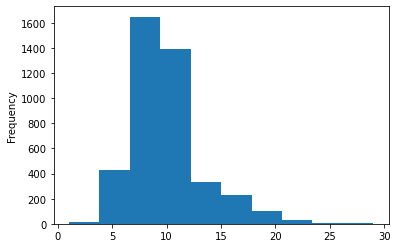

In [13]:
df.Rings.plot(kind='hist')

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

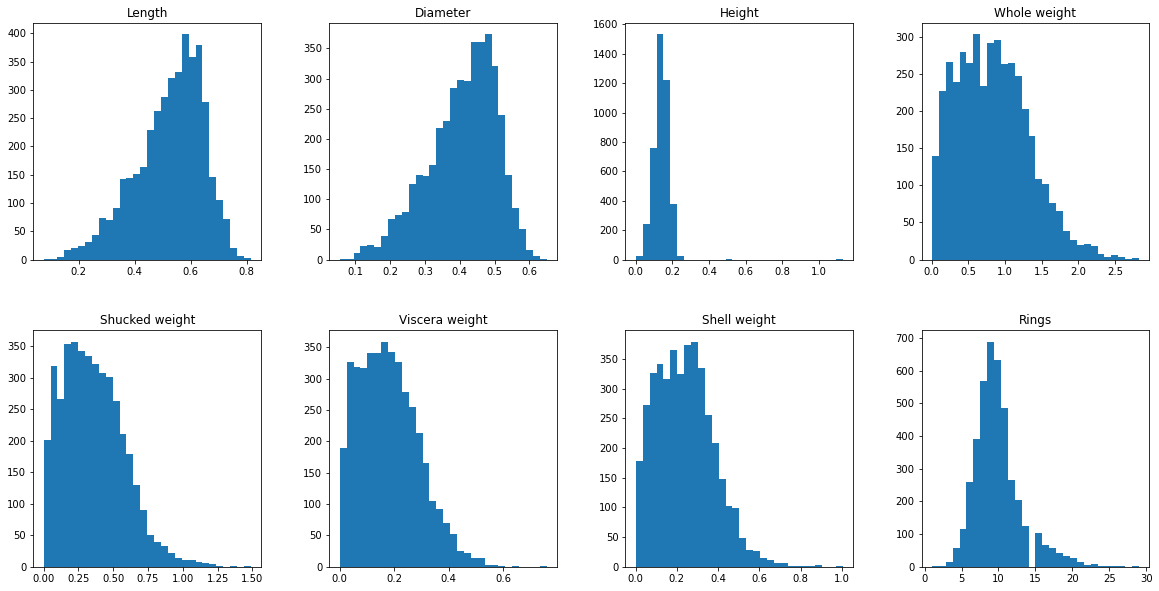

In [28]:
# univariate-analysis
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

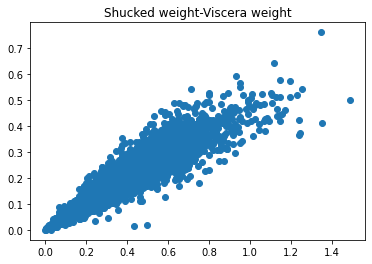

In [26]:
#Bi-variate analysis
cols = list(df.iloc[:,:7].columns)
for i in range(len(cols)-1):
    for j in range(i+1, len(cols)):
        continue
plt.scatter(df[cols[i]], df[cols[j]])
plt.title(cols[i]+'-'+cols[j])
plt.show()

In [31]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

C:\Users\ELCOT\AppData\Local\Temp/ipykernel_6808/914601936.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns


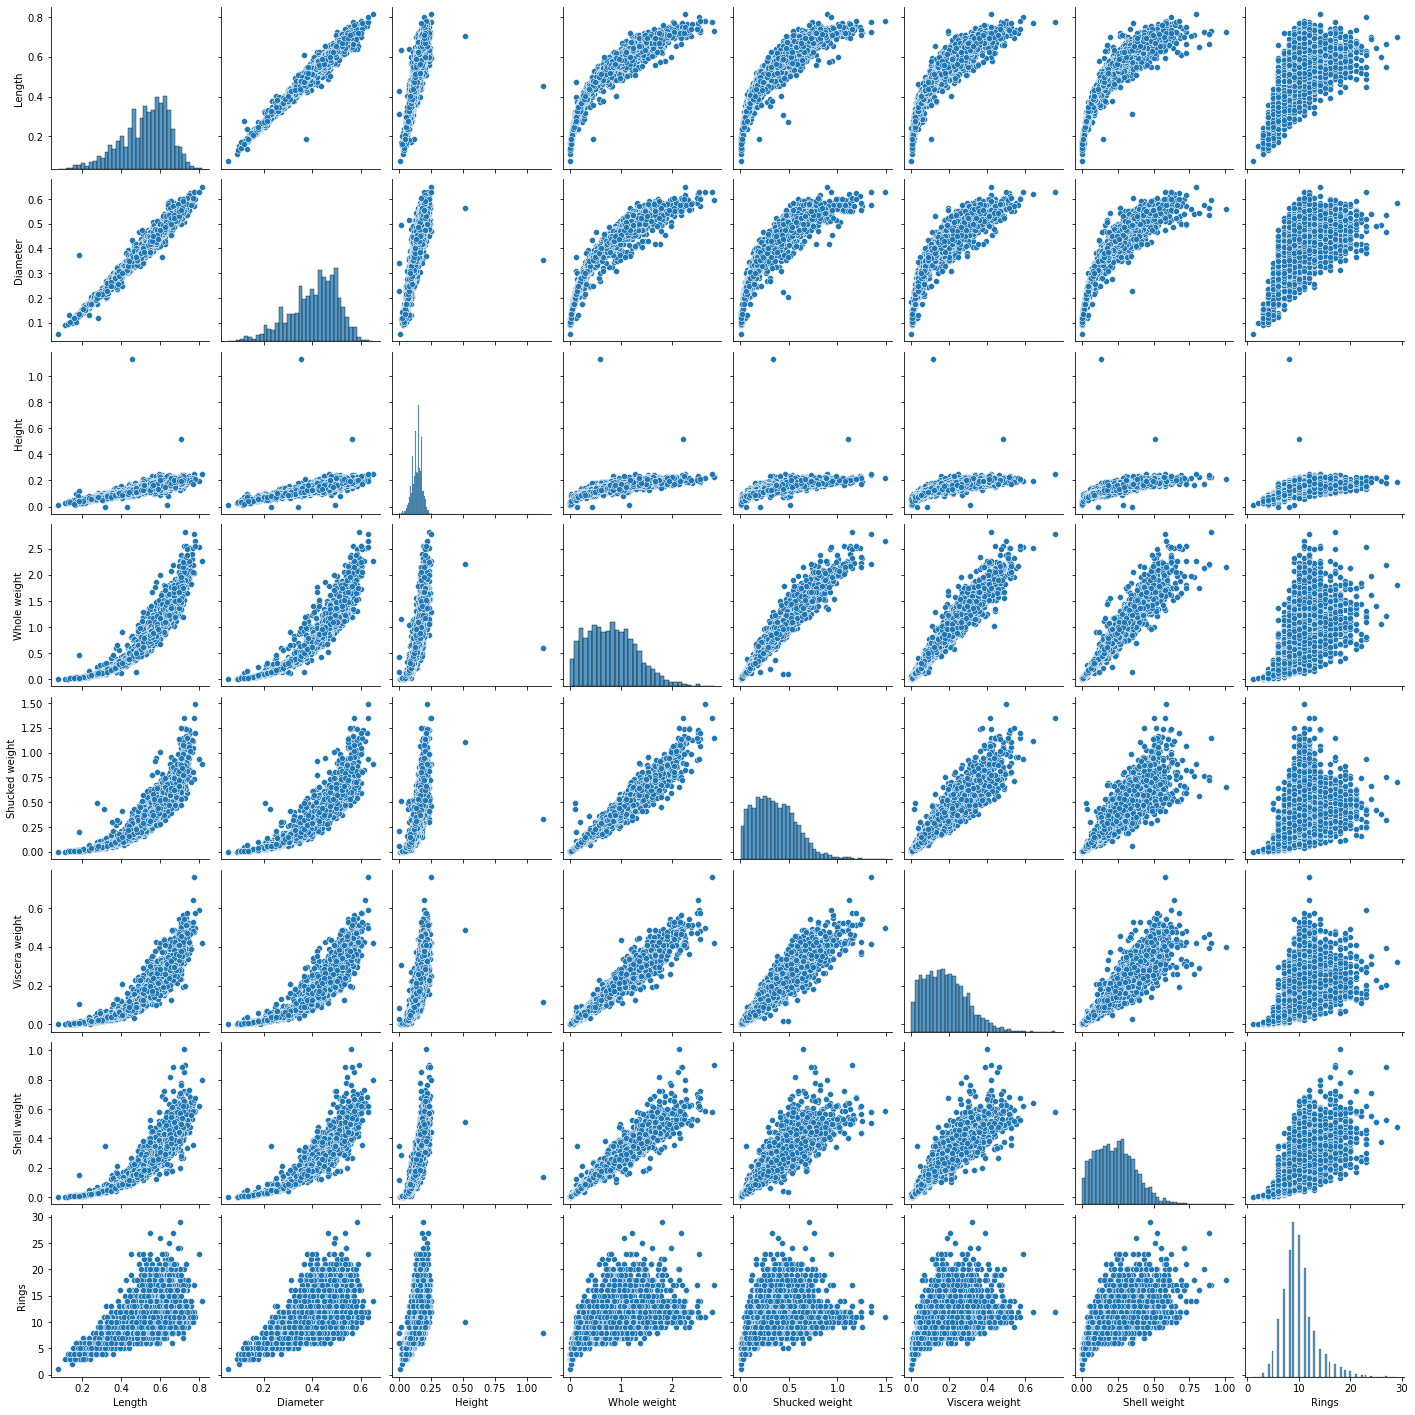

In [32]:
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
sns.pairplot(df[numerical_features])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


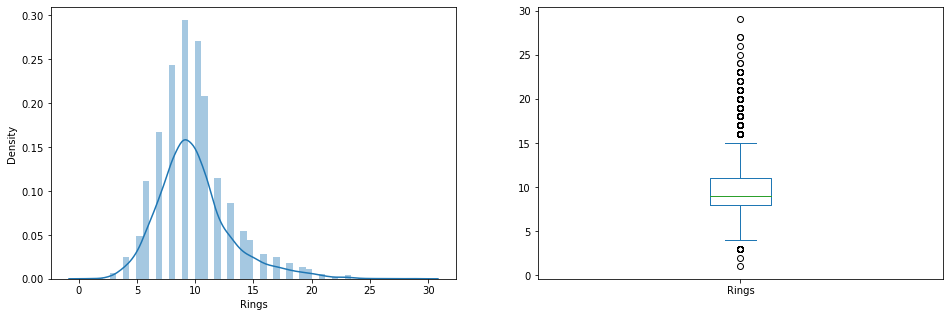

In [34]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Rings'])

plt.subplot(122)
df['Rings'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:>

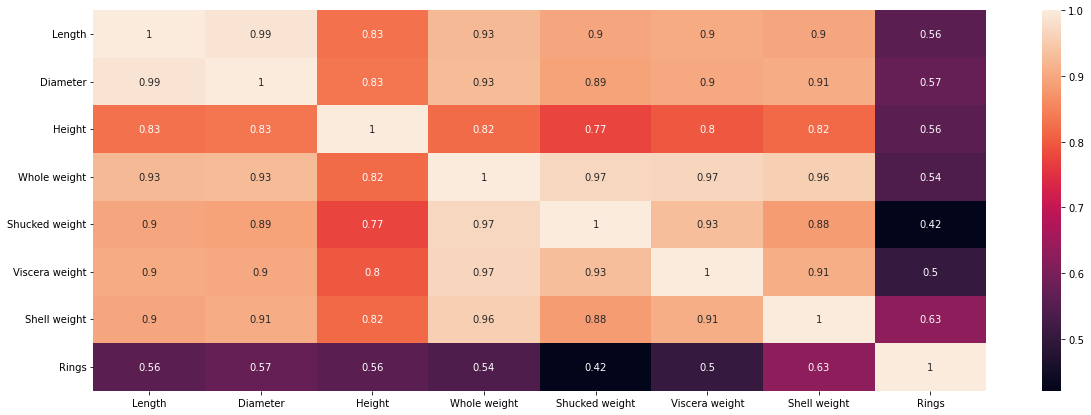

In [33]:
plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features].corr(), annot=True)

### (4). Perform descriptive statistics on the dataset.

In [35]:
# Check the number of rows and columns in the dataframe

df.shape

(4177, 9)

In [36]:
# Check the column-wise info of the dataframe

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [37]:
df.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

### (5). Check for Missing values and deal with them.

In [38]:
# Sorting the columns to check the null %

((df.isnull().sum()/df.index.size)*100).sort_values(ascending=False)

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [39]:
df.isnull().sum().sum()
# there is no missing values in the dataset

0

Text(0, 0.5, 'Column Name')

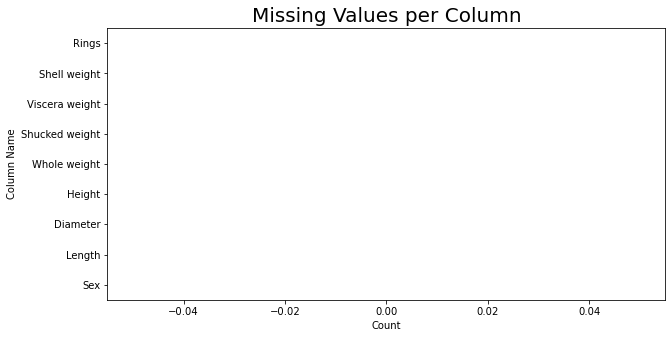

In [40]:
#create plot
plt.figure(figsize = [10, 5])
plt.title('Missing Values per Column', size = 20)
na_counts = df.isna().sum().sort_values(ascending = True)

na_counts.plot.barh(x = na_counts.values, y = na_counts.index);
plt.xlabel('Count', size = 10)
plt.ylabel('Column Name', size = 10)

### (6). Find the outliers and replace them outliers

<AxesSubplot:>

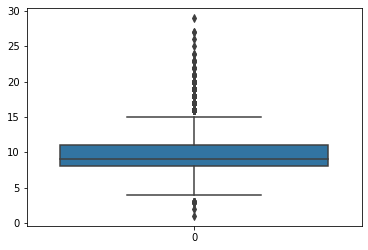

In [42]:
#no missing values
sns.boxplot(data=df['Rings'])

<AxesSubplot:>

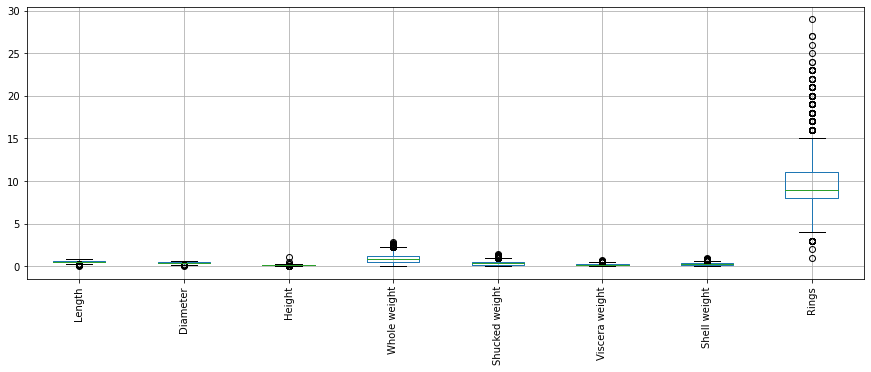

In [45]:
df.boxplot( rot = 90, figsize=(15,5))

In [47]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df['Rings'],)
plt.grid(True)

In [49]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['Rings'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['Rings'] > 25)].index, inplace=True)

### (7). Check for Categorical columns and perform encoding.

In [50]:
categorical_features

Index(['Sex'], dtype='object')

In [51]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

Features  Skewness degree
2          Height         3.167866
7           Rings         1.016494
4  Shucked weight         0.642633
6    Shell weight         0.568604
5  Viscera weight         0.530536
3    Whole weight         0.462174
1        Diameter        -0.624074
0          Length        -0.652059

<AxesSubplot:xlabel='Sex', ylabel='count'>

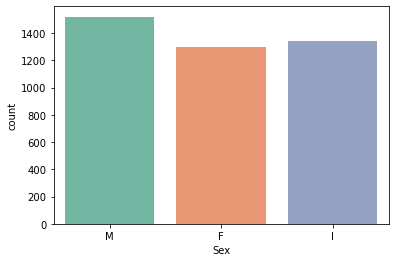

In [53]:
sns.countplot(x = 'Sex', data = df, palette="Set2")

In [55]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

C = pd.get_dummies(df)

C.head()

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0         0.150     15      0      0      1  
1         0.070      7      0      0      1  
2         0.210      9      1      0      0  
3         0.155     10      0      0      1  
4         0.055      7      0      1      0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Sex', ylabel='Rings'>

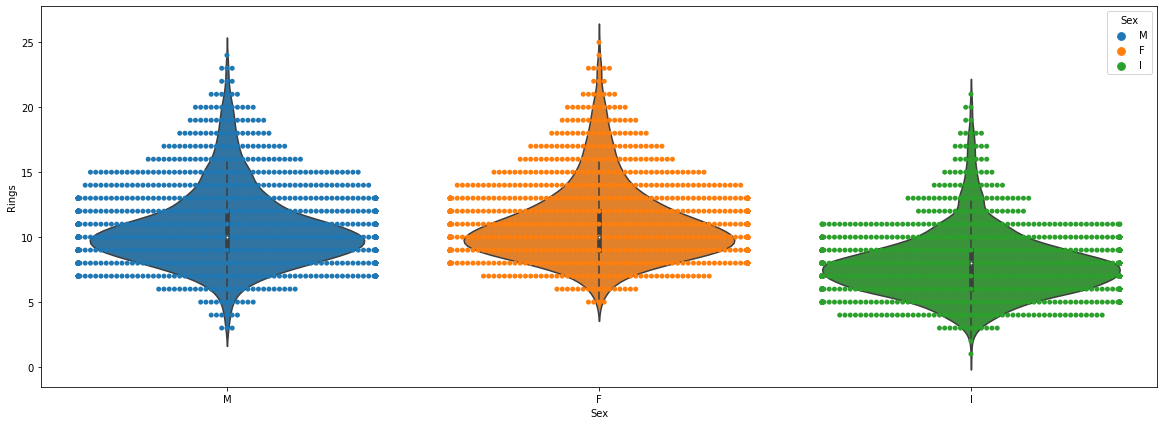

In [56]:
#plot
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Rings', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Rings', data = df)

### (8). Split the data into dependent and independent variables.

In [72]:
# splitting the dataset into x(independent variables) and y(dependent variables)
x = df.drop(['Rings','Sex'], axis = 1)
y = df['Rings']

print(x.shape)
print(y.shape)

print(x.columns)

(4163, 7)
(4163,)
Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')


### (9). Scale the independent variables

In [84]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

standardScale = StandardScaler()
standardScale.fit_transform(x)


array([[-0.57099935, -0.42791461, -1.06245142, ..., -0.60787921,
        -0.72701446, -0.63732941],
       [-1.44850169, -1.43987731, -1.18241955, ..., -1.18045642,
        -1.21243962, -1.22001299],
       [ 0.05578804,  0.12866487, -0.10270633, ..., -0.46129945,
        -0.35254361, -0.20031673],
       ...,
       [ 0.64078961,  0.68524435,  1.57684758, ...,  0.77088671,
         0.99740065,  0.51347066],
       [ 0.84971874,  0.78644062,  0.25719808, ...,  0.7960801 ,
         0.75237652,  0.42606812],
       [ 1.56007778,  1.49481451,  1.33691131, ...,  2.69474613,
         1.82031189,  1.87549352]])

### (10). Split the data into training and testing

In [60]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3122, 8)
(3122,)
(1041, 8)
(1041,)


In [82]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### (11). Build the Model

In [90]:
x_train.to_csv("abalone-train.csv",index = False)
x_test.to_csv("abalone-test.csv",index = False)

In [91]:
corr = df.corr(method = 'pearson')
print(corr['Rings'])

Length            0.559028
Diameter          0.576238
Height            0.558202
Whole weight      0.541056
Shucked weight    0.422096
Viscera weight    0.506249
Shell weight      0.626835
Rings             1.000000
Name: Rings, dtype: float64


### Linear Regression
###### Function for simple linear (straight-line) regression model to predict rings

In [97]:
def linear_fit(data):
    regressor = LinearRegression()
    shell_weight = np.array(data['Shell weight'])
    shell_weight = shell_weight.reshape(-1,1)
    Rings = np.array(data['Rings'])
    Rings = Rings.reshape(-1,1)
    regressor.fit(shell_weight, Rings)
    y_pred = regressor.predict(shell_weight)
    return y_pred

In [105]:
from math import sqrt
[x_train, x_test] =train_test_split(df, test_size=0.30, random_state=42, shuffle = True)
error_train = sqrt(mean_squared_error(x_train['Rings'], linear_fit(x_train))) #computing the error in train data
error_test = sqrt(mean_squared_error(x_test['Rings'],linear_fit(x_test)))#computing the error in test data
print("RMSE Error for Linear Regression, Train data is : %.2f"%(error_train))
print("RMSE Error for Linear Regression, Test data is : %.2f"%(error_test))

RMSE Error for Linear Regression, Train data is : 2.53
RMSE Error for Linear Regression, Test data is : 2.47


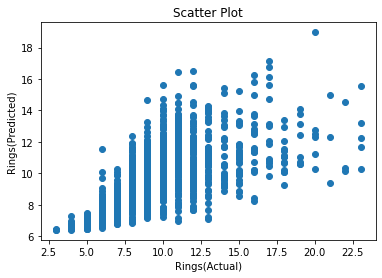

In [106]:
plt.title("Scatter Plot") 
plt.xlabel("Rings(Actual)")
plt.ylabel("Rings(Predicted)")
plt.scatter(x_test['Rings'], linear_fit(x_test))
plt.show()

In [115]:
x_train.Sex = x_train.Sex.replace({"M":1, "I":0, "F":-1})
x_test.Sex = x_test.Sex.replace({"M":1, "I":0, "F":-1})

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
rf_params = {'n_estimators': 200, 
             'min_samples_split': 2,
             'min_samples_leaf': 4, 
             'max_features': 'sqrt', 
             'max_depth': None, 
             'bootstrap': True}

model = RandomForestRegressor(random_state=1, **rf_params)

model.fit(X_train, y_train)

print("Train rmse : ", rmse(y_train, model.predict(X_train)))
print("Test rmse : ", rmse(y_test, model.predict(X_test)))

In [ ]:
Train rmse :  1.5313840467501842
Test rmse :  2.146490954202156

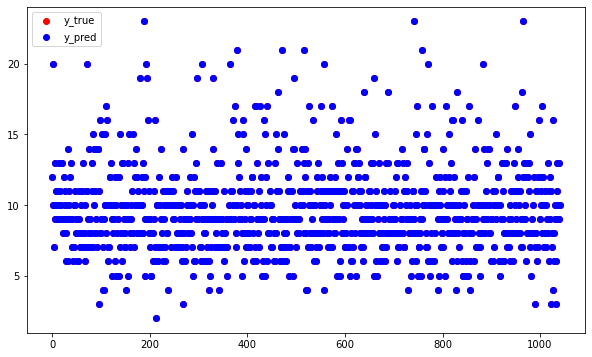

In [129]:

fig = plt.figure(figsize=(10, 6))
plt.scatter(range(y_test.shape[0]), y_test, color='red', label='y_true')
plt.scatter(range(y_test.shape[0]), y_test, color='blue', label='y_pred')
plt.legend()
plt.show()

## Thankyou...!